<a href="https://colab.research.google.com/github/nechebarrena/HOML/blob/main/HOML_cap_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPITULO 10 - HANDS ON MACHINE LEARNING**
## **Una introduccion a las redes neuronales con Keras**



En este capitulo vamos a introducir por primera vez la API Keras. En particular vamos a utilizar la implementacion para TensorFlow.

In [1]:
!python3 -m pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.7/dist-packages (2.5.0)


In [2]:
import tensorflow as tf
from tensorflow import keras
print('Version de Tensor Flow ==> ',tf.__version__)
print('Version de Keras ==> ',keras.__version__)

Version de Tensor Flow ==>  2.5.0
Version de Keras ==>  2.5.0


La version de keras no termina con un -tf tal como dice el libro. ¿Por que?

Vamos a tratar de resolver un problema de clasificacion de imagenes. En particular vamos a trabajar con un dataset incluido en Keras.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test,y_test) = fashion_mnist.load_data()

Forma del dataset =  (60000, 28, 28)
Maximo =  255  Minimo =  0
[0 1 2 3 4 5 6 7 8 9]


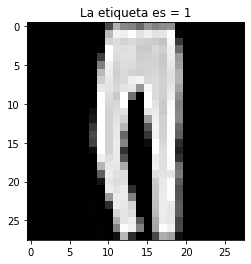

In [4]:
print('Forma del dataset = ',X_train_full.shape)
import matplotlib.pyplot as plt
import numpy as np
N = 285
plt.figure()
plt.imshow(X_train_full[N],cmap='gray', vmin=0, vmax=255)
plt.title("La etiqueta es = " +  str(int(y_train_full[N])))
print("Maximo = ",X_train_full.max()," Minimo = ",X_train_full.min())
print(np.unique(y_train_full))

En total tenemos $60$ mil imagenes en el conujunto de train. Las imagenes son matrices de $28 \times 28$ que representan prendas de vestir. Cada elemento de imagen tiene un valor que va entre $0$ y $255$. En total tenemos $10$ clases que debemos poder clasificar. Estas clases estan etiquetadas por un entero entre $[0,9]$.

A su vez ya podemos notar que tenemos una division entre Train y Test pero no tenemos un conjunto de validacion. Vamos a hacer este split y ademas vamos a normalizar los valores llevandolos del $[0,255] \rightarrow [0,1]$.

In [31]:
X_valid = X_train_full[:5000]/255
X_train = X_train_full[5000:]/255
y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]
print(len(X_train))
print(len(X_valid))

55000
5000


Las clases el libro dicen que son las siguientes:

Text(0.5, 1.0, 'La etiqueta es = Bolso')

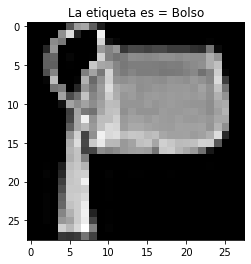

In [32]:
class_names = ["Remera","Pantalon","Pullover","Vestido","Saco","Sandalia","Camisa","Zapatilla","Bolso","Bota"]
plt.figure()
plt.imshow(X_train[N],cmap='gray', vmin=0, vmax=1)
plt.title("La etiqueta es = " +  class_names[y_train[N]])

Vamos a crear una red usando un diseño secuencial.

In [33]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(128,activation="relu"))
#model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
#model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5,validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7667 - accuracy: 0.7523 - val_loss: 0.5476 - val_accuracy: 0.8162
Epoch 2/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5212 - accuracy: 0.8223 - val_loss: 0.4821 - val_accuracy: 0.8356
Epoch 3/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4741 - accuracy: 0.8347 - val_loss: 0.4526 - val_accuracy: 0.8474
Epoch 4/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4483 - accuracy: 0.8454 - val_loss: 0.4395 - val_accuracy: 0.8454
Epoch 5/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4306 - accuracy: 0.8495 - val_loss: 0.4488 - val_accuracy: 0.8384


{'loss': [0.7666844725608826, 0.5211889743804932, 0.4741293787956238, 0.44825121760368347, 0.4305839538574219], 'accuracy': [0.7522727251052856, 0.8222908973693848, 0.834709107875824, 0.8453636169433594, 0.84947270154953], 'val_loss': [0.547609806060791, 0.4820639193058014, 0.4526456892490387, 0.4395141005516052, 0.44879966974258423], 'val_accuracy': [0.8162000179290771, 0.8356000185012817, 0.8474000096321106, 0.8453999757766724, 0.8384000062942505]}


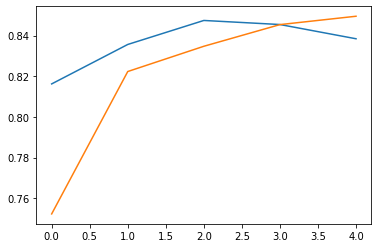

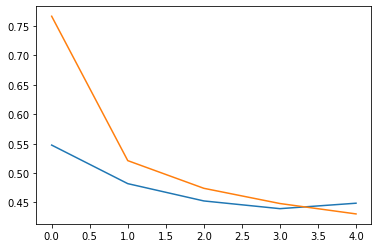

In [35]:
print(history.history)
plt.figure()
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

plt.figure()
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

10000 10000 10000
                 0    1             2    3  ...             6    7    8    9
9950  0.000000e+00  0.0  0.000000e+00  1.0  ...  0.000000e+00  0.0  0.0  0.0
9951  1.000000e+00  0.0  0.000000e+00  0.0  ...  0.000000e+00  0.0  0.0  0.0
9952  0.000000e+00  0.0  0.000000e+00  0.0  ...  0.000000e+00  0.0  1.0  0.0
9953  0.000000e+00  0.0  1.000000e+00  0.0  ...  1.323776e-28  0.0  0.0  0.0
9954  0.000000e+00  0.0  0.000000e+00  0.0  ...  0.000000e+00  0.0  0.0  1.0
9955  0.000000e+00  0.0  0.000000e+00  0.0  ...  1.000000e+00  0.0  0.0  0.0
9956  0.000000e+00  0.0  0.000000e+00  0.0  ...  0.000000e+00  0.0  0.0  1.0
9957  3.702318e-09  0.0  0.000000e+00  0.0  ...  1.000000e+00  0.0  0.0  0.0
9958  1.000000e+00  0.0  0.000000e+00  0.0  ...  0.000000e+00  0.0  0.0  0.0
9959  0.000000e+00  0.0  0.000000e+00  0.0  ...  0.000000e+00  0.0  0.0  0.0
9960  0.000000e+00  1.0  0.000000e+00  0.0  ...  0.000000e+00  0.0  0.0  0.0
9961  0.000000e+00  0.0  1.000000e+00  0.0  ...  0.000000e

(array([[9.253e+03, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         1.000e+00, 0.000e+00, 1.000e+00, 7.430e+02],
        [8.994e+03, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.004e+03],
        [9.373e+03, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 6.230e+02],
        [9.057e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 1.000e+00, 0.000e+00, 9.420e+02],
        [8.548e+03, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
         2.000e+00, 4.000e+00, 1.000e+00, 1.441e+03],
        [9.264e+03, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 1.000e+00, 7.330e+02],
        [8.754e+03, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
         2.000e+00, 2.000e+00, 1.000e+00, 1.236e+03],
        [8.989e+03, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
         0.000e+00, 1.

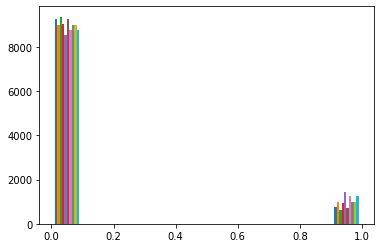

In [36]:
y_test_pred = model.predict(X_test)
import pandas as pd
from sklearn.metrics import precision_score, recall_score, classification_report 
#reporte = classification_report(y_test, y_test_pred, target_names=class_names)

#print(reporte)
print(len(X_test),len(y_test),len(y_test_pred))
print(pd.DataFrame(y_test_pred).tail(50))
plt.hist(y_test_pred)
